# Итоговый проект Python для анализа данных

## Задание 1
Загрузите файл HR.csv в pandas dataframe

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [60]:
df = pd.read_csv('./HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [61]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


***
## Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [62]:
# расчет основных статистических значений разумно выполнить одним вызовом метода describe()
df.drop(columns=['department', 'salary', 'Work_accident', 'left', 'promotion_last_5years'], axis=1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [63]:
# дополнительно рассчитаем значение моды, т.к. оно отсутствует в выводе describe()
df.drop(columns=['department', 'salary', 'Work_accident', 'left', 'promotion_last_5years'], axis=1).mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


***
## Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

Определите две самые скоррелированные и две наименее скоррелированные переменные.

<Axes: >

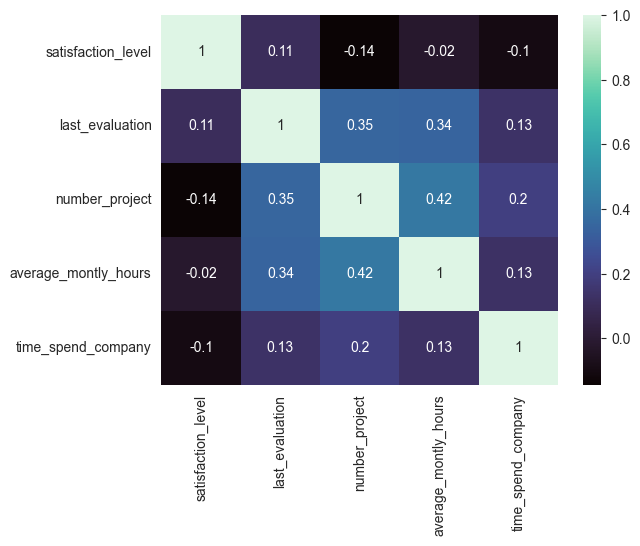

In [64]:
df_q = df.drop(columns=['department', 'salary', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
sns.heatmap(df_q.corr(), annot=True, cmap='mako')

**Вывод:** наиболее скоррелированными являются переменные number_project (количество проектов, выполненных за время работы) и average_monthly_hours (среднее количество часов на рабочем месте в месяц). Наименее скоррелированные - average_monthly_hours и satisfaction_level (уровень удовлетворенности работой)

***
## Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте

In [65]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

***
## Задание 5
Показать распределение сотрудников по зарплатам

<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, xlabel='Уровень заработной платы', ylabel='Количество сотрудников'>

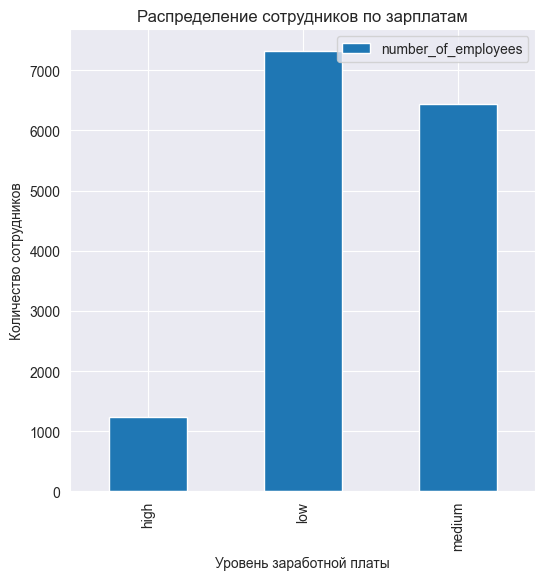

In [66]:
employees_by_salary = df[['salary', 'average_montly_hours']].rename(columns={'salary': 'salary', 'average_montly_hours': 'number_of_employees'})
employees_by_salary = employees_by_salary.groupby('salary').count()
employees_by_salary.plot(kind='bar', title='Распределение сотрудников по зарплатам',
                                     xlabel='Уровень заработной платы',
                                     ylabel='Количество сотрудников',
                                     figsize=(6,6))

***
## Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Text(0.5, 1.0, 'Распределение количества сотрудников по зарплатам в каждом департаменте')

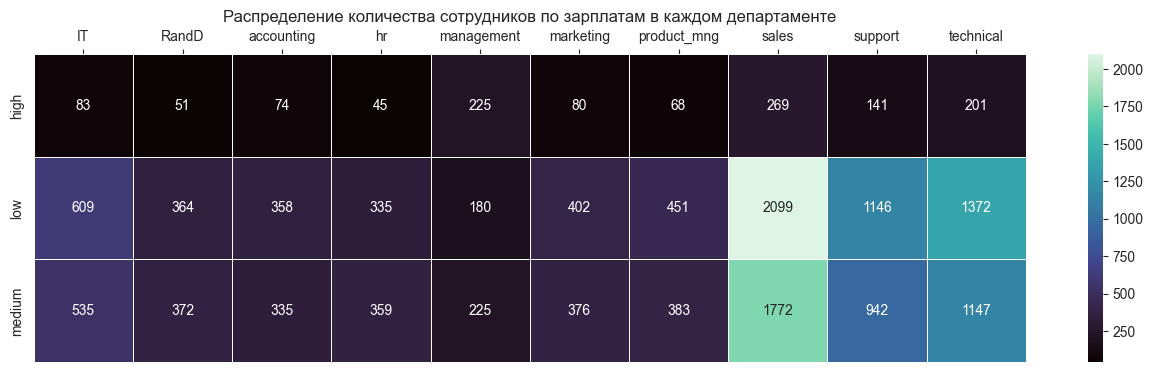

In [67]:
salary_by_department = df.pivot_table(columns='department', index='salary', values='satisfaction_level', aggfunc='count')
fig, ax = plt.subplots(figsize=(16,4))
htm = sns.heatmap(salary_by_department, cmap='mako', annot=True, ax=ax, linewidth=0.5, fmt='d')
htm.set(xlabel='', ylabel='')
htm.xaxis.tick_top()
plt.title('Распределение количества сотрудников по зарплатам в каждом департаменте')

***
## Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

<Axes: title={'center': 'average_montly_hours'}, xlabel='salary'>

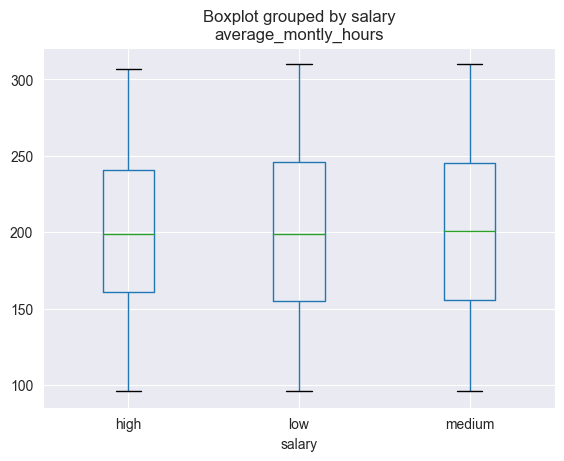

In [68]:
df.boxplot(column=['average_montly_hours'], by='salary', grid=True)

In [69]:
# применим факторизацию для расчета коэффициента корреляции
salary_corr = df.copy()
salary_corr['salary_fact'] = pd.factorize(salary_corr['salary'])[0]
salary_corr[['average_montly_hours', 'salary_fact']].corr()

,average_montly_hours,salary_fact
average_montly_hours,1.000000,-0.002242
salary_fact,-0.002242,1.000000


**Вывод:** корреляция между уровнем заработной платы сотрудников и средним значением времени, проведенном на рабочем месте не прослеживается

***
## Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- доля сотрудников с повышением за последние 5 лет,
- средняя степень удовлетворенности,
- среднее количество проектов

In [70]:
pd.pivot_table(df, index='left', values=['promotion_last_5years', 'satisfaction_level', 'number_project'], aggfunc={
    'promotion_last_5years': lambda x: sum(x) / len(x),
    'satisfaction_level': 'mean',
    'number_project': 'mean'})

,number_project,promotion_last_5years,satisfaction_level
left,,,
0,3.786664,0.026251,0.666810
1,3.855503,0.005321,0.440098


***
## Задание 9
1. Разделить данные на тестовую и обучающую выборки.
2. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
3. Оценить качество модели на тестовой выборки

In [71]:
df_lda = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]

# выполняем разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_lda, df['left'], random_state=42)

In [72]:
# обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [73]:
# прогноз на тестовой выборке
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [74]:
# разница между тестовыми данными и предсказанными моделью
result = pd.DataFrame([y_test, y_pred]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
10371,0.0,NaN
12541,1.0,NaN
2656,0.0,0.0
6759,0.0,NaN


In [75]:
# оценка качества модели с помощью accuracy
accuracy_score(y_test, y_pred)

0.7536

In [78]:
# оценка качества с помощью F-меры, применяемой при несбалансированной выборке данных (сильное отличие количества уволившихся сотрудников от неуволившихся)
report = classification_report(y_test, y_pred, target_names=['non-left', 'left'])
print(report)

              precision    recall  f1-score   support

    non-left       0.79      0.91      0.85      2853
        left       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750


**Вывод:** получаем удовлетворительное поведение модели на тестовой выборке с точностью 75% предсказывающую, уволится сотрудник или нет.

Оценка качества с помощью F-меры разделяет классы, показывая для каждого precision (долю объектов, названных классификатором положительными и при этом действительно являющимися положительными), recall (долю объектов положительного класса из всех объектов положительного класса нашел алгоритм), а также общую метрику F-меру.